In [33]:
import numpy as np
import pandas as pd

In [34]:
death = pd.read_csv('./Dataset/datasets-session-21/time_series_covid19_deaths_global.csv')
confirm = pd.read_csv('./Dataset/datasets-session-21/time_series_covid19_confirmed_global.csv')

In [35]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [36]:
death = death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_death')

In [37]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [38]:
confirm = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_cases')

In [40]:
# Now we will merge both "death" and "confirm"
confirm.merge(death, on=['Province/State','Country/Region','Lat','Long','date'])[['Country/Region','Province/State','num_cases','num_death']]

,Country/Region,Province/State,num_cases,num_death
0,Afghanistan,NaN,0,0
1,Albania,NaN,0,0
2,Algeria,NaN,0,0
3,Andorra,NaN,0,0
4,Angola,NaN,0,0
...,...,...,...,...
311248,West Bank and Gaza,NaN,703228,5708
311249,Winter Olympics 2022,NaN,535,0
311250,Yemen,NaN,11945,2159
311251,Zambia,NaN,334661,4024


# Pivot Table

### The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.
#### It is applied on categorical data
##### Instead of using pivot table, we can also use groupby() and unstack() to analyze the dataset. But pivot table is more flexible and provide a shortcut way to bring out the result

In [9]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
df.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc='sum') # we can specify anything for aggfunc like: count,etc

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [11]:
df.pivot_table(index=['sex','smoker'], columns=['day','time'], values='total_bill', aggfunc='sum') # aggfunc by default mean hota hai

day              Thur           Fri           Sat           Sun        
time            Lunch Dinner  Lunch  Dinner Lunch  Dinner Lunch  Dinner
sex    smoker                                                          
Male   Yes     191.71   0.00  34.16  129.46   0.0  589.62   0.0  392.12
       No      369.73   0.00   0.00   34.95   0.0  637.73   0.0  877.34
Female Yes     134.53   0.00  39.78   48.80   0.0  304.00   0.0   66.16
       No      381.58  18.78  15.98   22.75   0.0  247.05   0.0  291.54

In [12]:
df.pivot_table(index=['sex','smoker'], columns=['day','time'], values='tip', aggfunc='mean')

day                Thur          Fri              Sat       Sun
time              Lunch Dinner Lunch Dinner    Dinner    Dinner
sex    smoker                                                  
Male   Yes     3.058000    NaN  1.90  3.246  2.879259  3.521333
       No      2.941500    NaN   NaN  2.500  3.256563  3.115349
Female Yes     2.990000    NaN  2.66  2.700  2.868667  3.500000
       No      2.437083    3.0  3.00  3.250  2.724615  3.329286

In [13]:
# margin
df.pivot_table(index=['sex','smoker'], columns=['day','time'], values='total_bill', aggfunc='sum', margins=True)

day               Thur           Fri           Sat            Sun           \
time             Lunch Dinner  Lunch  Dinner Lunch   Dinner Lunch   Dinner   
sex    smoker                                                                
Male   Yes      191.71   0.00  34.16  129.46   0.0   589.62   0.0   392.12   
       No       369.73   0.00   0.00   34.95   0.0   637.73   0.0   877.34   
Female Yes      134.53   0.00  39.78   48.80   0.0   304.00   0.0    66.16   
       No       381.58  18.78  15.98   22.75   0.0   247.05   0.0   291.54   
All            1077.55  18.78  89.92  235.96   NaN  1778.40   NaN  1627.16   

day                All  
time                    
sex    smoker           
Male   Yes     1337.07  
       No      1919.75  
Female Yes      593.27  
       No       977.68  
All            4827.77

In [15]:
df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'], aggfunc = {'size': 'mean', 'tip': 'max', 'total_bill': 'sum'}, margins=True)

size                                                 \
day                Thur              Fri                 Sat       Sun   
time              Lunch Dinner     Lunch    Dinner    Dinner    Dinner   
sex    smoker                                                            
Male   Yes     2.300000    NaN  1.666667  2.400000  2.629630  2.600000   
       No      2.500000    NaN       NaN  2.000000  2.656250  2.883721   
Female Yes     2.428571    NaN  2.000000  2.000000  2.200000  2.500000   
       No      2.500000    2.0  3.000000  2.000000  2.307692  3.071429   
All            2.459016    2.0  2.000000  2.166667  2.517241  2.842105   

                          tip               ...       total_bill         \
day                 All  Thur          Fri  ...   All       Thur          
time                    Lunch Dinner Lunch  ...            Lunch Dinner   
sex    smoker                               ...                           
Male   Yes     2.500000  5.00    NaN  2.20  ...  10.0     191.71   0.00   
       No      2.711340  6.70    NaN   NaN  ...   9.0     369.73   0.00   
Female Yes     2.242424  5.00    NaN  3.48  ...   6.5     134.53   0.00   
       No      2.592593  5.17    3.0  3.00  ...   5.2     381.58  18.78   
All            2.569672  6.70    3.0  3.48  ...  10.0    1077.55  18.78   

                                                                     
day              Fri           Sat            Sun               All  
time           Lunch  Dinner Lunch   Dinner Lunch   Dinner           
sex    smoker                                                        
Male   Yes     34.16  129.46   0.0   589.62   0.0   392.12  1337.07  
       No       0.00   34.95   0.0   637.73   0.0   877.34  1919.75  
Female Yes     39.78   48.80   0.0   304.00   0.0    66.16   593.27  
       No      15.98   22.75   0.0   247.05   0.0   291.54   977.68  
All            89.92  235.96   NaN  1778.40   NaN  1627.16  4827.77  

[5 rows x 23 columns]

In [16]:
df = pd.read_csv('./Dataset/datasets-session-22/expense_data.csv')

In [17]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [20]:
# As "Date" is an object(String) and that's why we can't extract month from it, therefore we will convert into datetime object
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df['Month'] = df['Date'].dt.month_name()

In [22]:
df['Month']

0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: Month, Length: 277, dtype: object

In [23]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


<Axes: xlabel='Month'>

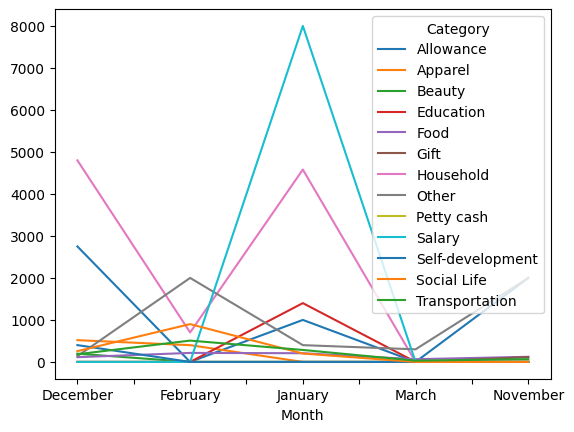

In [32]:
df.pivot_table(index='Month', columns='Category', values='INR', fill_value=0, aggfunc='mean').plot()

<Axes: xlabel='Month'>

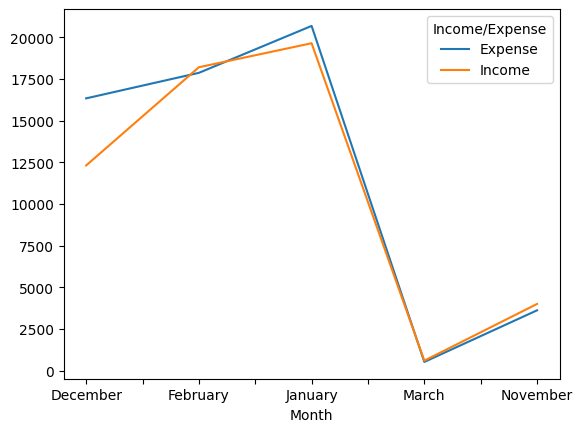

In [29]:
df.pivot_table(index='Month', columns='Income/Expense', values='INR', fill_value=0, aggfunc='sum').plot()

<Axes: xlabel='Month'>

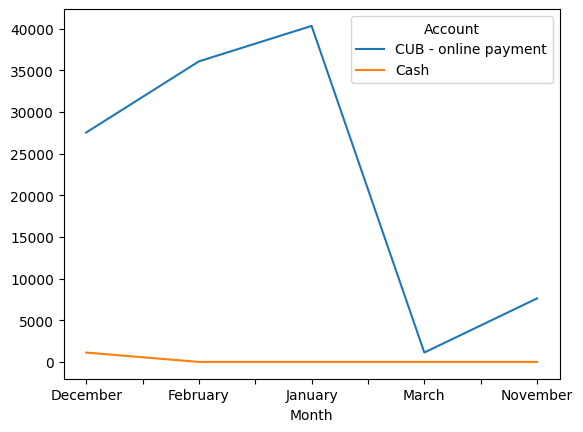

In [31]:
df.pivot_table(index='Month', columns='Account', values='INR', fill_value=0, aggfunc='sum').plot()